Question 1:

Analysis on the dataset will be done on Borough 5 only. After running the cell below, it can be seen that there are quite a few missing values in multiple columns. Using samples that contain missing values from these columns could skew results. Therefore samples with missing values will be removed.

In [219]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import missingno as msno
from scipy.stats import skew, norm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

all_data = pd.read_csv('20to22NYC.csv')

#Analysis will be done on Borough 5 only
all_data = all_data.query("BOROUGH == 5")
#dropped apartment number since there are alot of missing values (analysis was done in earlier version of code)
all_data = all_data.drop(columns=['APARTMENT NUMBER'])

all_data.head(5)
all_data.tail(5)
all_data.info()

# count the total number of missing values
all_data.isnull().values.sum()

# column-wise summary of missing values
all_data.isna().sum()

C:\Users\alexr\AppData\Local\Temp\ipykernel_5700\920900941.py:22: DtypeWarning:

Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.



,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,9,A5,4726 AMBOY ROAD,10312.0,1.0,0.0,1.0,3067.0,910.0,2002.0,1,A5,0.0,2020-07-02
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5404,46,A1,119 LENZIE STREET,10312.0,1.0,0.0,1.0,8000.0,3660.0,1998.0,1,A1,315000.0,2020-10-02
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,6,A1,118 ELMBANK STREET,10312.0,1.0,0.0,1.0,6200.0,2580.0,1975.0,1,A1,450000.0,2020-06-24
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5425,31,A1,7 SANDGAP STREET,10312.0,1.0,0.0,1.0,2500.0,1222.0,1925.0,1,A2,525000.0,2020-07-02
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,17,A5,91 EAGAN AVENUE,10312.0,1.0,0.0,1.0,1845.0,1854.0,1986.0,1,A5,480000.0,2020-01-14


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
122444,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,V0,N/A LENEVAR AVENUE,10309.0,0.0,0.0,0.0,2597.0,0.0,NaN,1,V0,1116638.0,2022-12-19
122445,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,V0,96 LENEVAR AVENUE,10309.0,0.0,0.0,0.0,2644.0,0.0,NaN,1,V0,1116638.0,2022-12-19
122446,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7349,37,V0,N/A ENGLEWOOD AVENUE,10309.0,0.0,0.0,0.0,43800.0,0.0,NaN,1,V0,40000.0,2022-06-28
122447,5,WOODROW,21 OFFICE BUILDINGS,4,7011,1,O7,401 BLOOMINGDALE ROAD,10309.0,0.0,6.0,6.0,9682.0,8395.0,2000.0,4,O7,1600000.0,2022-07-18
122448,5,WOODROW,22 STORE BUILDINGS,4,7144,510,K2,3120 ARTHUR KILL ROAD,10309.0,0.0,1.0,1.0,98115.0,7795.0,1977.0,4,K2,5600000.0,2022-12-19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25593 entries, 0 to 122448
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         25593 non-null  int64  
 1   NEIGHBORHOOD                    25593 non-null  object 
 2   BUILDING CLASS CATEGORY         25593 non-null  object 
 3   TAX CLASS AT PRESENT            25592 non-null  object 
 4   BLOCK                           25593 non-null  int64  
 5   LOT                             25593 non-null  int64  
 6   BUILDING CLASS AT PRESENT       25592 non-null  object 
 7   ADDRESS                         25593 non-null  object 
 8   ZIP CODE                        25580 non-null  float64
 9   RESIDENTIAL UNITS               25250 non-null  object 
 10  COMMERCIAL UNITS                23719 non-null  object 
 11  TOTAL UNITS                     25284 non-null  object 
 12  LAND SQUARE FEET               

7632

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 1
BLOCK                                0
LOT                                  0
BUILDING CLASS AT PRESENT            1
ADDRESS                              0
ZIP CODE                            13
RESIDENTIAL UNITS                  343
COMMERCIAL UNITS                  1874
TOTAL UNITS                        309
LAND SQUARE FEET                  1908
GROSS SQUARE FEET                 1908
YEAR BUILT                        1275
TAX CLASS AT TIME OF SALE            0
BUILDING CLASS AT TIME OF SALE       0
SALE PRICE                           0
SALE DATE                            0
dtype: int64

In [221]:
#drop rows with NaN values
all_data = all_data.dropna()
# count the total number of missing values
all_data.isnull().values.sum()

# column-wise summary of missing values
all_data.isna().sum()

0

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Apartment number was dropped since there are alot of missing values. Then rows with other missing values were dropped so that the regression analysis later on will run efficiently. 

Question 2:

Questions to analyze the potential recovery of the NYC real estate market post-COVID19:
- What did the sale price trend look like during covid (2020 to 2021) compared to after covid (2022)?
- Were residential units bought more before or after covid?
- When were sales taken place?

Statistical Hypothesis:
Sale price will drop during covid then quickly increase to the normal average. Residential unit sales will drop during covid.

Q2.1: What did the sale price trend look like during covid (2020 to 2021) compared to after covid (2022)?

In [222]:
def sale_year (row):
    if row['SALE DATE'] >= '2020-01-01' and row['SALE DATE'] <= '2020-12-31' :
        return '2020'
    if row['SALE DATE'] >= '2021-01-01' and row['SALE DATE'] <= '2021-12-31' :
        return '2021'
    return '2022'

all_data['SALE YEAR'] = all_data.apply (lambda row: sale_year(row), axis=1)

#created filter on sale price to get rid of outliers
all_data = all_data[(all_data['SALE PRICE'] > 99999) & (all_data['SALE PRICE'] < 10000000)]

df = px.data.tips()
fig = px.box(all_data, x="SALE YEAR", y="SALE PRICE",category_orders={"SALE YEAR": [2020, 2021, 2022]})
fig.update_xaxes(type='category')

As it can be seen from the plot above, the sale price was more spread out in 2020 then condensed each year. The max sale price decreased and the median sale price increased. It can be concluded that during covid the sale price was less predictable and had a bigger range but after covid sale prices began to gravitate towards a higher median but smaller and more predicatble range.

Q2.2: Were residential units bought more before or after covid?

In [223]:
fig = px.histogram(all_data, x = 'SALE DATE', y = 'RESIDENTIAL UNITS')
fig.show()

It can be seen that at the start of covid that residential units sales dropped and were not being sold that much but during covid and after covid residential unit sales went back to average. Near the very end of covid the amount of residential sales drop alittle.

Q2.3: When were sales taken place?

In [224]:
#shows sale date vs amount
fig = px.histogram(all_data, x = 'SALE DATE')
fig.show()

Number of sales were pretty much consistent throughout covid and just after covid. There was a dip around March 2020 but number of sales got back up to average around September 2020.

The hypothesis was pretty much correct. These questions were important since they show how covid effected the housing market and what that did to the popularity of residential units.

Question 3:

Regression analysis on house sale prices. Some data analysis and transforms of the columns was done below to make the data more useable. Some analysis on skewness was conducted to analyze the distribution of the sale price and to see if the sale price needs to be transformed before put in to the regression model.

C:\Users\alexr\AppData\Local\Temp\ipykernel_5700\3952551392.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



LAND SQUARE FEET             45.859336
GROSS SQUARE FEET            43.654136
RESIDENTIAL UNITS            37.910420
TOTAL UNITS                  34.377961
COMMERCIAL UNITS             15.726363
LOT                           8.843063
SALE PRICE                    8.447811
TAX CLASS AT TIME OF SALE     5.923923
dtype: float64

c:\Users\alexr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



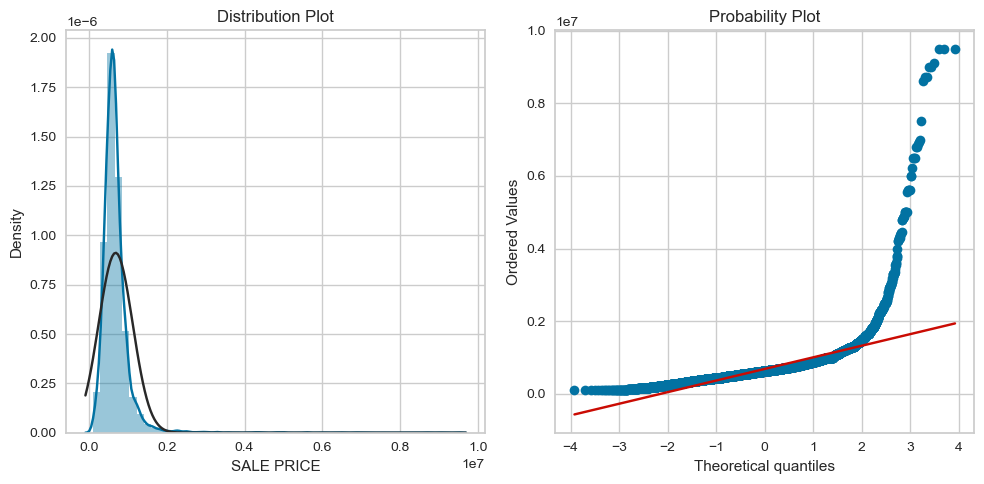

In [225]:
# Visualize and calculate the skewness
skewness = all_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 1]

def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(all_data['SALE PRICE'])

As seen above, the sale price is concentrated on the left so taking the log of the sale price will create a linear trend that we can use in the regression model.

Note: The next chunk of code has an error but still runs and produces the charts.

c:\Users\alexr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



TypeError: unsupported operand type(s) for +: 'int' and 'str'

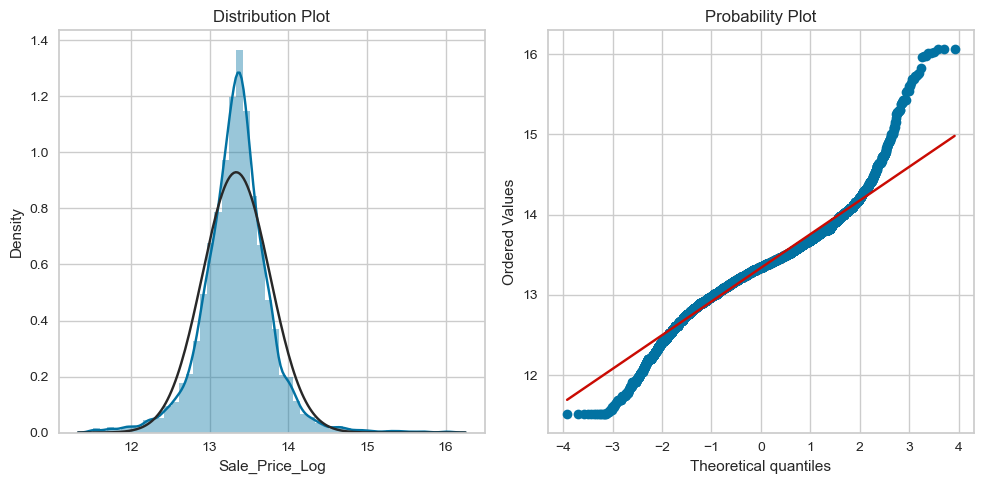

In [227]:
# deal with the skewness issue
all_data['Sale_Price_Log'] = np.log(1 + all_data['SALE PRICE'])
normality_plot(all_data['Sale_Price_Log'])

# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 1].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['SALE PRICE','Sale_Price_Log']
]

# Log-transform skewed columns
for col in skewed_cols:
    all_data[col] = np.log(1 + all_data[col])


Now the sale price log distribution is distributed more to the centre of the range with a linear trend.

In [228]:
# check categorical and ordinal features
df_ = all_data.select_dtypes(include=['object', 'category'])
for col in df_.columns:
    print(df_[col].value_counts()) # to print count of every category

GREAT KILLS                  1663
ELTINGVILLE                   802
ARDEN HEIGHTS                 693
NEW SPRINGVILLE               684
TOTTENVILLE                   599
BULLS HEAD                    587
MIDLAND BEACH                 528
WEST NEW BRIGHTON             495
MARINERS HARBOR               461
WESTERLEIGH                   455
PORT RICHMOND                 451
SOUTH BEACH                   440
CASTLETON CORNERS             411
WILLOWBROOK                   398
ROSEBANK                      387
WOODROW                       362
ANNADALE                      359
PRINCES BAY                   353
NEW DORP                      350
NEW BRIGHTON                  345
HUGUENOT                      338
ROSSVILLE                     305
MANOR HEIGHTS                 280
GRANT CITY                    243
STAPLETON                     208
DONGAN HILLS                  206
CLOVE LAKES                   196
NEW DORP-HEIGHTS              195
CONCORD                       186
NEW DORP-BEACH

The next few chunks of code are converting ordinal and categorical values to numerical values that we can use in the regression model.

In [229]:
# deal with condition and quality attributes
def OrdinalsToNumerics(input_data):
    input_data['TAX CLASS AT PRESENT'] = input_data['TAX CLASS AT PRESENT'].map(lambda x: {'1':1, '1A':2, '1B':3, '1C':4, '2':5, '2A':6, '2B':7, '2C':8, '4':9}.get(x, 0))

    ordinal_cols = ['TAX CLASS AT PRESENT']

    input_data[ordinal_cols] = input_data[ordinal_cols].apply(pd.to_numeric, axis=1)

OrdinalsToNumerics(all_data)

In [230]:
# create time-related features
all_data['SALE YEAR'] = all_data['SALE YEAR'].astype(int)
all_data['Age'] = all_data.apply(lambda x: x['SALE YEAR']-x['YEAR BUILT'], axis=1)

In [231]:
def CatigoricalToNumeric(input,attribute):
    input[attribute] = input[attribute].astype('category').cat.codes

CatigoricalToNumeric(all_data,'NEIGHBORHOOD')
CatigoricalToNumeric(all_data,'BUILDING CLASS CATEGORY')
CatigoricalToNumeric(all_data,'RESIDENTIAL UNITS')
CatigoricalToNumeric(all_data,'COMMERCIAL UNITS')
CatigoricalToNumeric(all_data,'BUILDING CLASS AT PRESENT')
CatigoricalToNumeric(all_data,'BUILDING CLASS AT TIME OF SALE')

all_data.head(5)
all_data.tail(5)
all_data.info()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,Sale_Price_Log,Age
1,5,0,0,1,5404,46,1,119 LENZIE STREET,10312.0,1,...,2.301316,2.219800,1998.0,1,1,315000.0,2020-10-02,2020,12.660331,22.0
2,5,0,0,1,5407,6,1,118 ELMBANK STREET,10312.0,1,...,2.275467,2.181088,1975.0,1,1,450000.0,2020-06-24,2020,13.017005,45.0
3,5,0,0,1,5425,31,1,7 SANDGAP STREET,10312.0,1,...,2.177526,2.092982,1925.0,1,2,525000.0,2020-07-02,2020,13.171155,95.0
4,5,0,0,1,6205,17,4,91 EAGAN AVENUE,10312.0,1,...,2.142507,2.143078,1986.0,1,4,480000.0,2020-01-14,2020,13.081543,34.0
5,5,0,0,1,6205,83,1,7 SEGUINE PLACE,10312.0,1,...,2.229105,2.168036,2004.0,1,1,720000.0,2020-10-15,2020,13.487008,16.0


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR,Sale_Price_Log,Age
122433,5,57,1,1,7317,145,11,48 ROBIN COURT,10309.0,2,...,2.203229,2.172891,1994.0,1,11,625000.0,2022-08-02,2022,13.345509,28.0
122434,5,57,1,1,7319,1,9,434 BLOOMINGDALE ROAD,10309.0,2,...,2.244300,2.088243,2010.0,1,9,975000.0,2022-09-06,2022,13.790194,12.0
122441,5,57,1,1,7355,78,11,82 AMBASSADOR LANE,10309.0,2,...,2.170976,2.180429,2001.0,1,11,618000.0,2022-01-07,2022,13.334245,21.0
122447,5,57,10,9,7011,1,53,401 BLOOMINGDALE ROAD,10309.0,0,...,2.320241,2.306130,2000.0,4,54,1600000.0,2022-07-18,2022,14.285515,22.0
122448,5,57,11,9,7144,510,39,3120 ARTHUR KILL ROAD,10309.0,0,...,2.525241,2.298714,1977.0,4,40,5600000.0,2022-12-19,2022,15.538277,45.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 1 to 122448
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         15613 non-null  int64  
 1   NEIGHBORHOOD                    15613 non-null  int8   
 2   BUILDING CLASS CATEGORY         15613 non-null  int8   
 3   TAX CLASS AT PRESENT            15613 non-null  int64  
 4   BLOCK                           15613 non-null  int64  
 5   LOT                             15613 non-null  int64  
 6   BUILDING CLASS AT PRESENT       15613 non-null  int8   
 7   ADDRESS                         15613 non-null  object 
 8   ZIP CODE                        15613 non-null  float64
 9   RESIDENTIAL UNITS               15613 non-null  int8   
 10  COMMERCIAL UNITS                15613 non-null  int8   
 11  TOTAL UNITS                     15613 non-null  object 
 12  LAND SQUARE FEET               

Question 4:

Next we will try and determine if multicollinearity exists between attributes by using heatmaps.

<AxesSubplot:>

<AxesSubplot:>

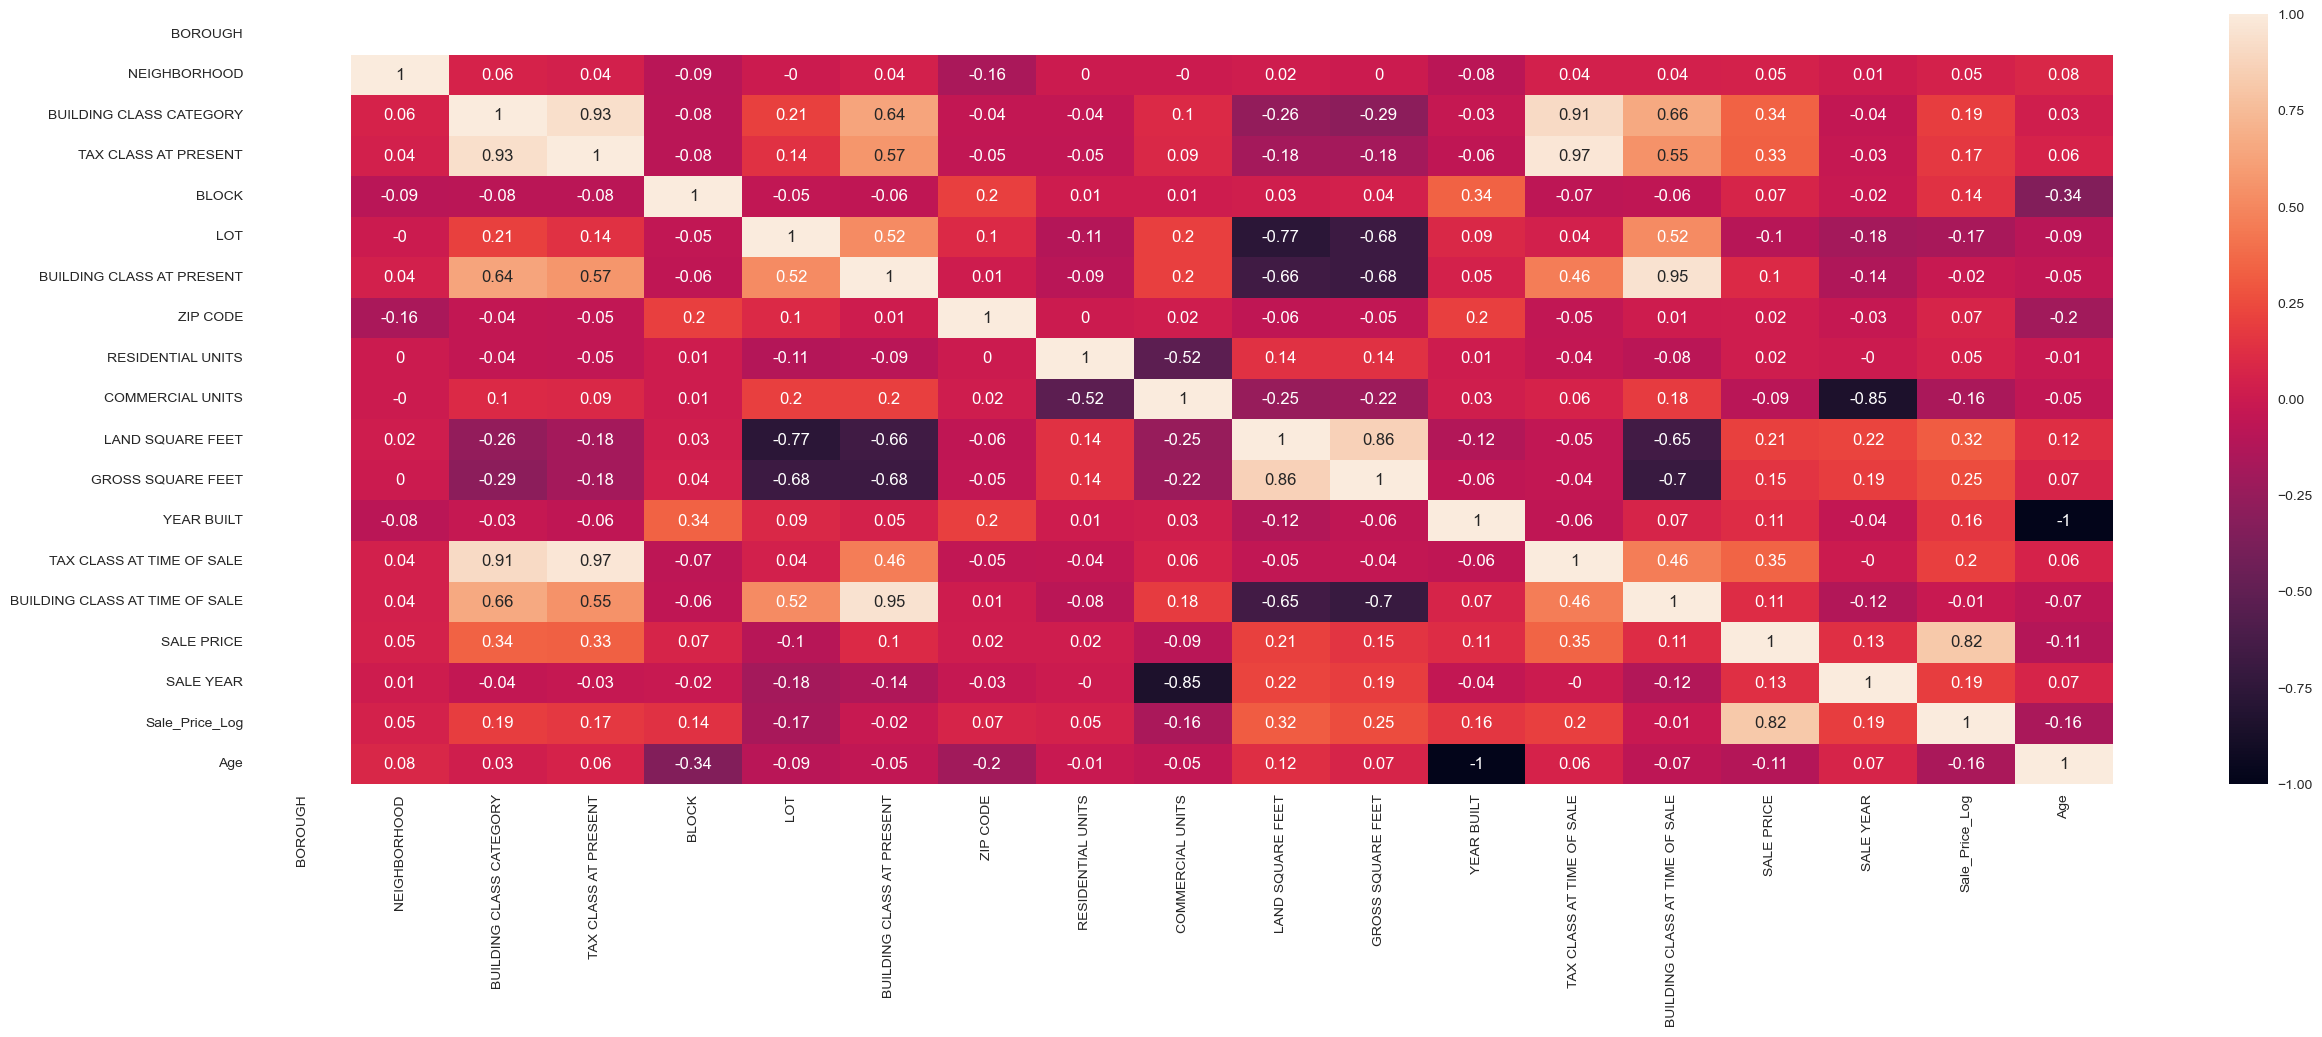

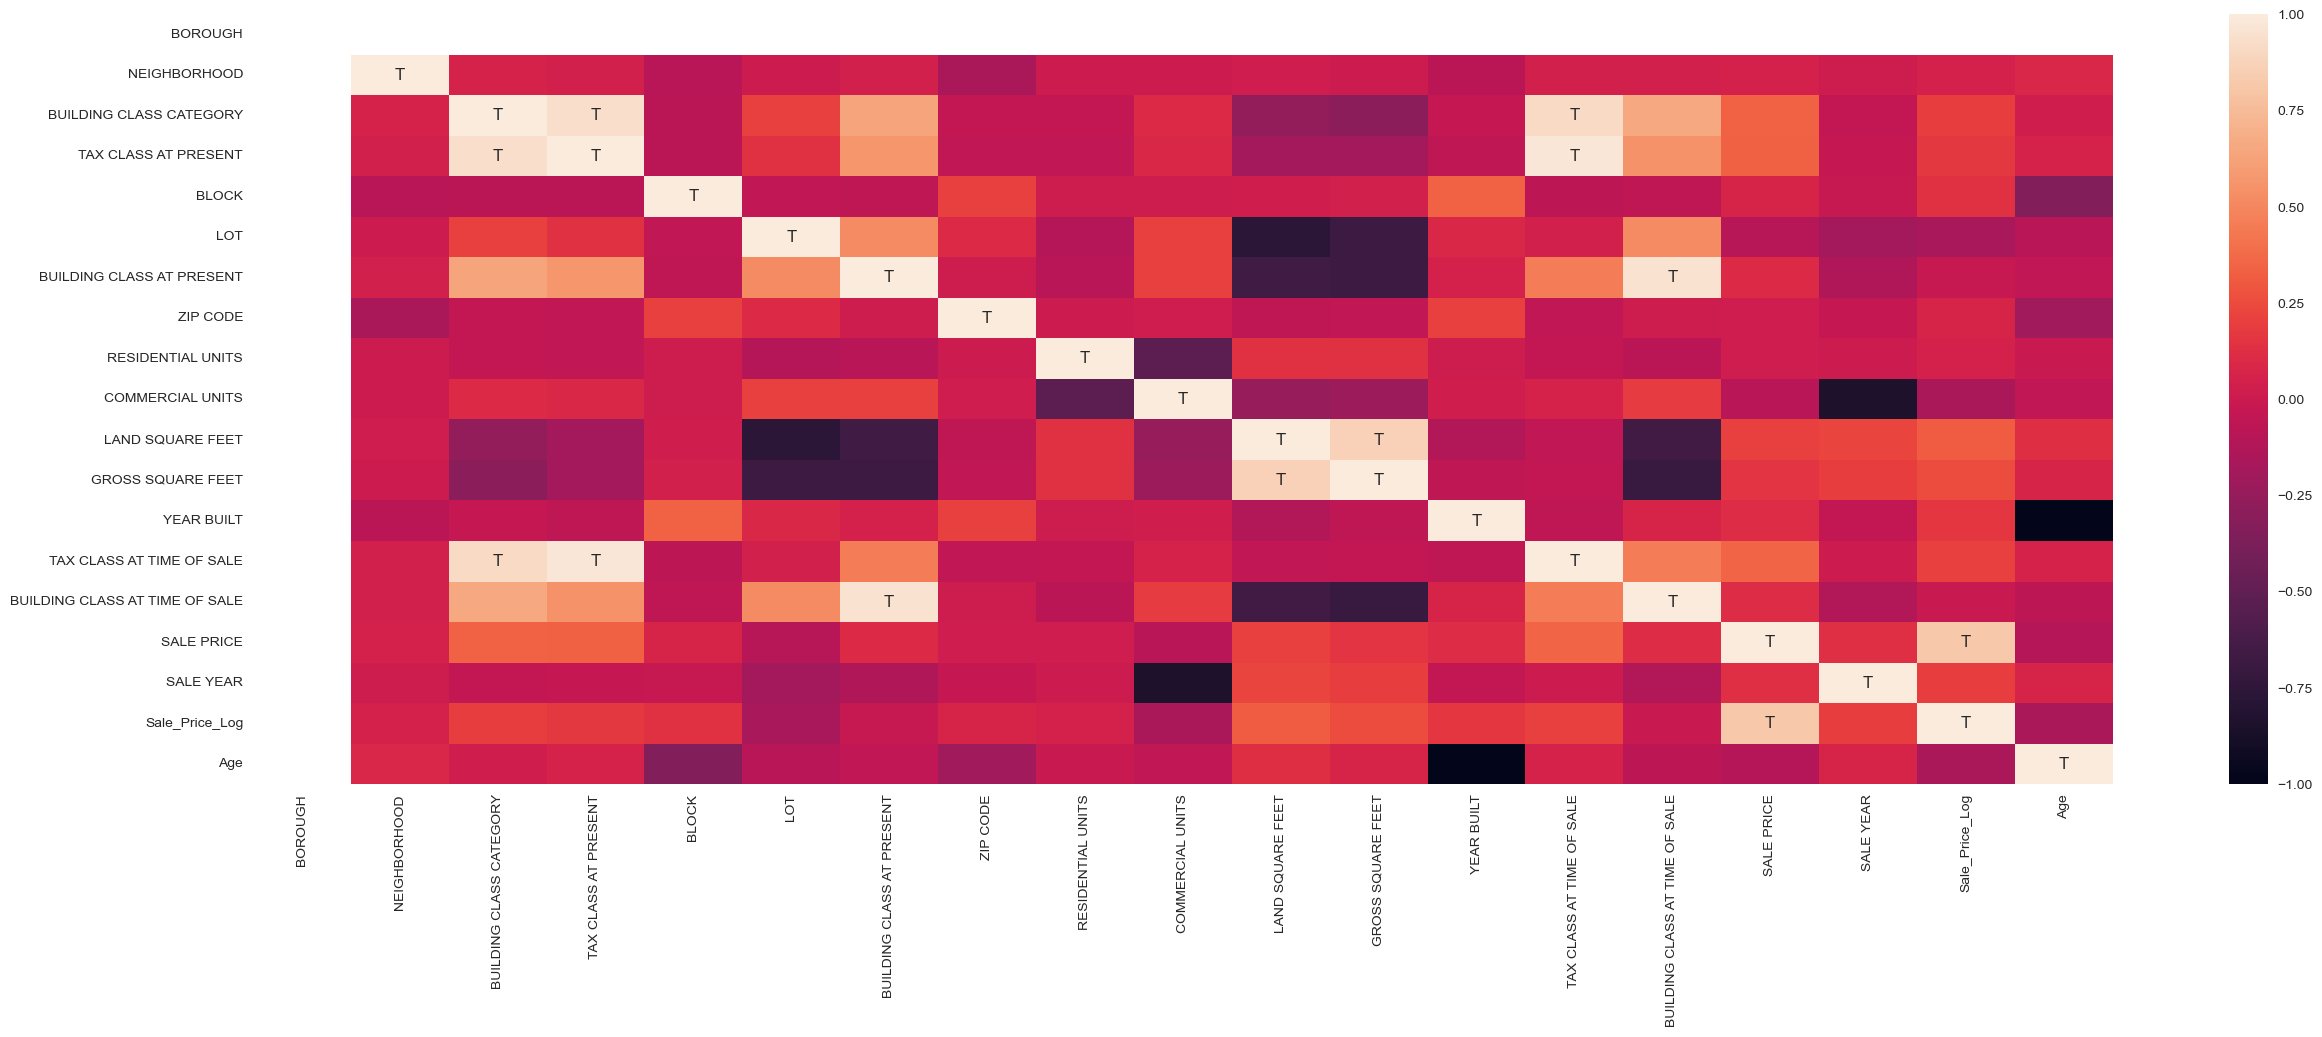

In [232]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = all_data.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')

As seen above, most of the attributes contain average collinearity with a few containing no collinearilty (the black ones) and a few being very collinear (T). 

,ADDRESS,TOTAL UNITS,SALE DATE
ADDRESS,1.000000,0.980173,0.976443
TOTAL UNITS,0.980173,1.000000,0.283206
SALE DATE,0.976443,0.283206,1.000000


<AxesSubplot:>

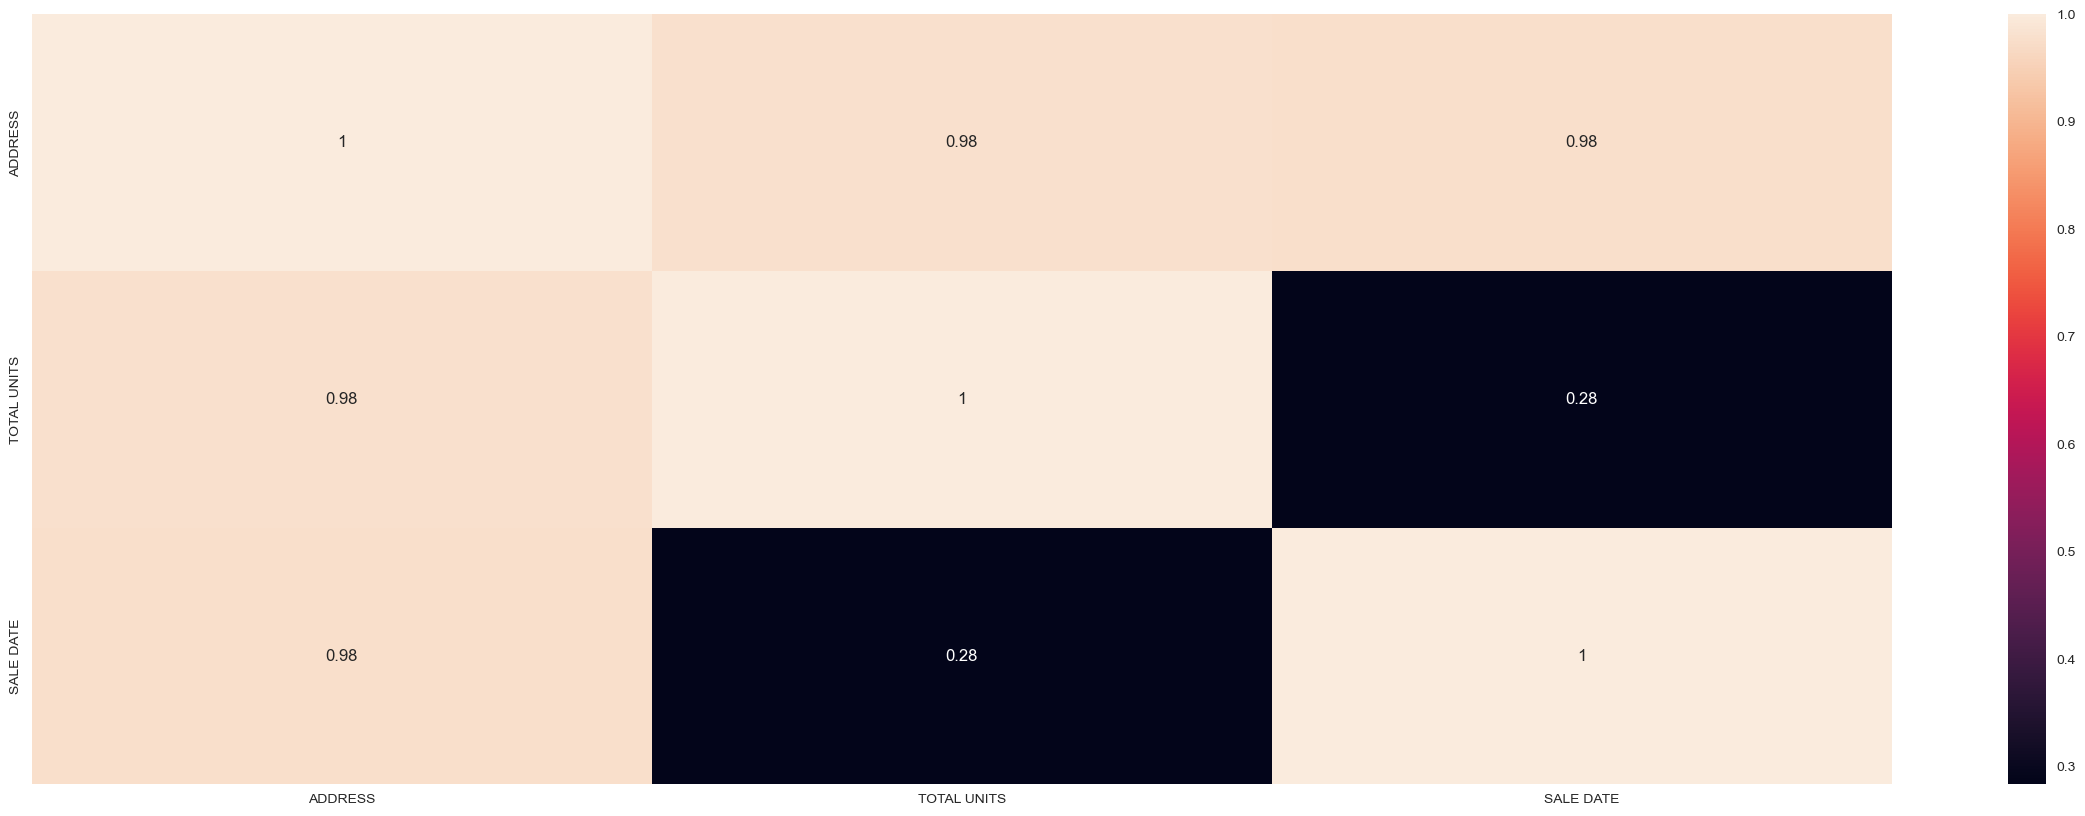

In [233]:
import association_metrics as am
# Convert you str columns to Category columns
df = all_data.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cramersv.fit(), ax=ax, annot=True)

Heatmap on the leftover categorical attributes show multicollinearity except for sale date and total units.

Question 3 cont.:

The selected attributes can be seen below. Categorical attributes were not used since it messed up the regression model. 

In [234]:
from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

# 'ADDRESS',
selected_attributes = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
                        'Age', 'BLOCK', 'LOT', 'ZIP CODE', 'LAND SQUARE FEET',
                       'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE',
                       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'Sale_Price_Log'] 


selected_data = all_data[selected_attributes]


#feature scaling and dummy attributes creation
numerical_cols = list(selected_data.select_dtypes(exclude=['object']).columns)
#for sale_price and sale_price_log, we do not want to scale them
numerical_cols = numerical_cols[:-2]
scaler = RobustScaler()
selected_data[numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])

selected_data = pd.get_dummies(selected_data, drop_first=True)
print("final data shape", selected_data.shape)

selected_data.to_csv('first_attempt_raw.csv', index=False)

# split the data into train and test set
train, test = train_test_split(selected_data, test_size=0.2, shuffle=True, random_state=123)

y_train = train['SALE PRICE']
y_test = test['SALE PRICE']
y_train_log = train['Sale_Price_Log']
y_test_log = test['Sale_Price_Log']
X_train = train.drop(['SALE PRICE','Sale_Price_Log'], axis=1)
X_test  = test.drop(['SALE PRICE','Sale_Price_Log'], axis=1)

C:\Users\alexr\AppData\Local\Temp\ipykernel_5700\1235256399.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



final data shape (15613, 14)


Question 5:

Below we are running the baseline model.

In [235]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test(model):
    print(model)
    model.fit(X_train.values, y_train.values)
    print("RMSE train: {}".format(rmse(y_train.values, model.predict(X_train.values))))
    print("RMSE test : {}".format(rmse(y_test.values,  model.predict(X_test.values))))
    
    plt.scatter(y_test, model.predict(X_test.values), s=5 )
    plt.xlabel('Real Price')
    plt.ylabel('Predicted Price')
    plt.title( "Real vs Predicted Housing Prices")
    plt.show()

    plt.scatter( y_test,model.predict(X_test.values)-y_test, s=5)
    plt.xlabel('Real Price')
    plt.ylabel('Residual')
    plt.title( "Residuals vs Real")
    plt.show()

def residual_plots(X_train, X_test, Y_train, Y_test, Predicted_Y_train, Predicted_Y_test):
    interested_attribute_groups = ['']

   

LinearRegression()
RMSE train: 365753.4393011114
RMSE test : 419866.01635321404


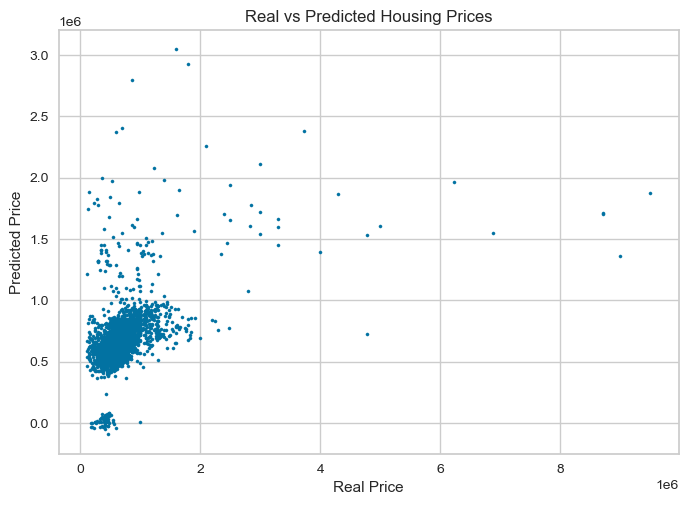

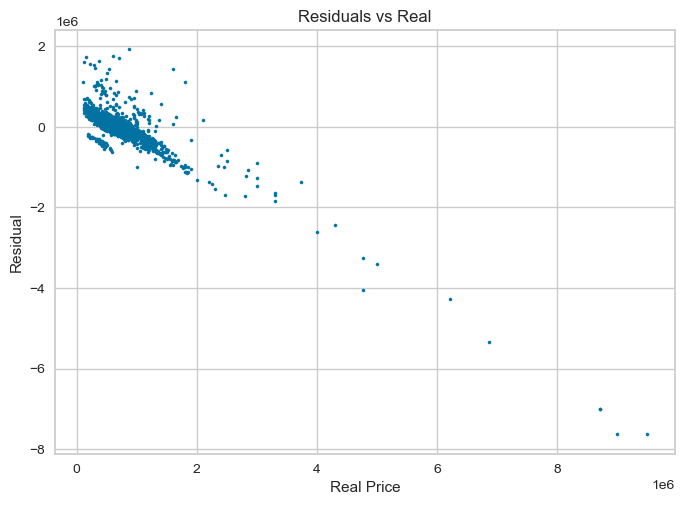

Ridge(alpha=20.0)
RMSE train: 365756.8079218007
RMSE test : 419650.63514610165


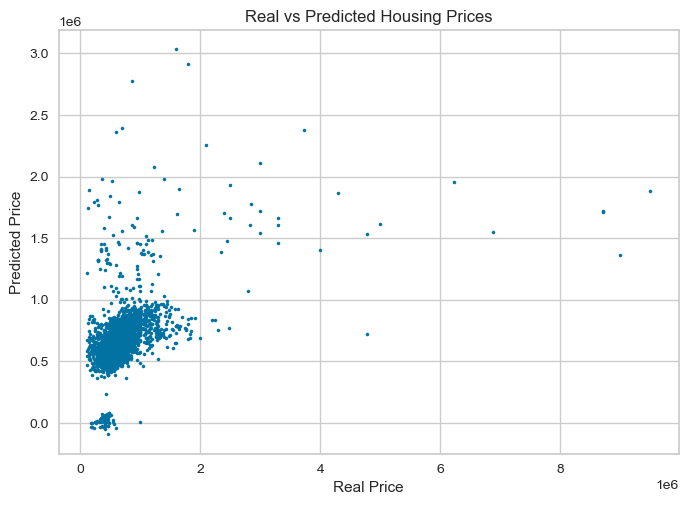

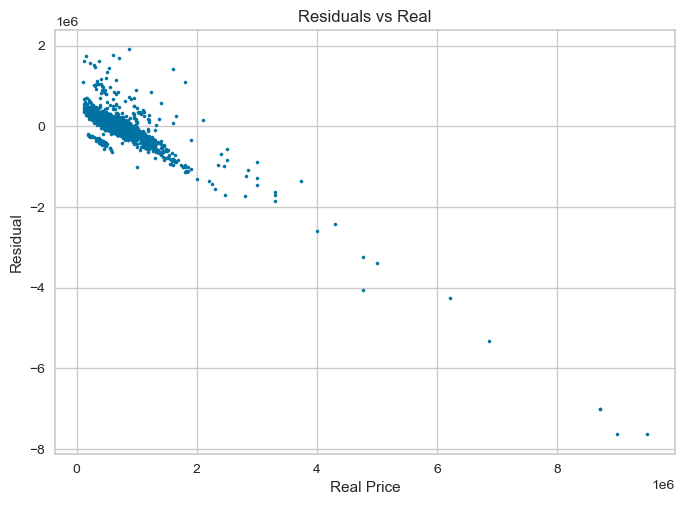

In [236]:
# a multiple linear regression model
model_base = linear_model.LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

lambda_list_lasso = list(np.linspace(0.0006, 0.0007, 11))
model_lasso = Lasso(alpha=lambda_list_lasso[0], max_iter=500000)

for model in [model_base, model_ridge]:
    train_test(model)

In [237]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)
rmse(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     380.6
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:32:50   Log-Likelihood:            -1.7772e+05
No. Observations:               12490   AIC:                         3.555e+05
Df Residuals:                   12477   BIC:                         3.556e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

419866.016353214

It can be seen that the baseline model performed poorly with 26.8% accuracy. Next an enhanced model will be attempted.

For the enhanced model, I will try using the log y values to see if it performs better.

In [238]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def train_test_log(model):
    print(model)
    model.fit(X_train.values, y_train_log.values)
    print("RMSE train: {}".format(rmse(y_train_log.values, model.predict(X_train.values))))
    print("RMSE test : {}".format(rmse(y_test_log.values,  model.predict(X_test.values))))
    
    plt.scatter(y_test_log, model.predict(X_test.values), s=5 )
    plt.xlabel('Real Price log')
    plt.ylabel('Predicted Price log')
    plt.title( "Real vs Predicted Housing Prices log")
    plt.show()

    plt.scatter( y_test_log,model.predict(X_test.values)-y_test, s=5)
    plt.xlabel('Real Price log')
    plt.ylabel('Residual log')
    plt.title( "Residuals vs Real log")
    plt.show()

def residual_plots(X_train, X_test, Y_train, Y_test, Predicted_Y_train, Predicted_Y_test):
    interested_attribute_groups = ['']

LinearRegression()
RMSE train: 0.36336949260809914
RMSE test : 0.37369782147250546


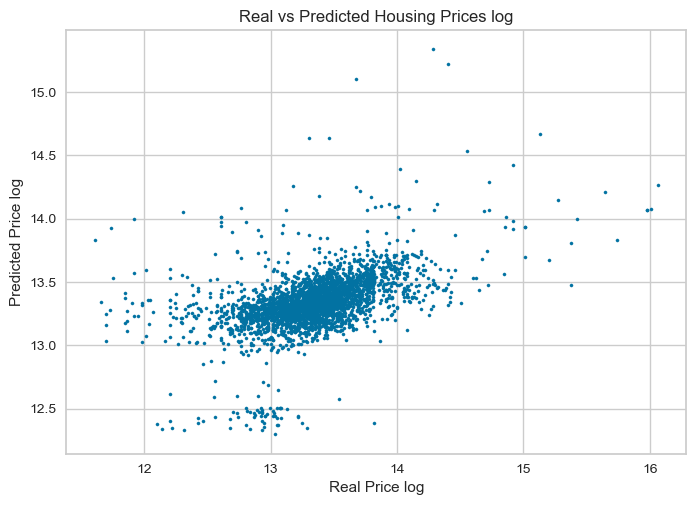

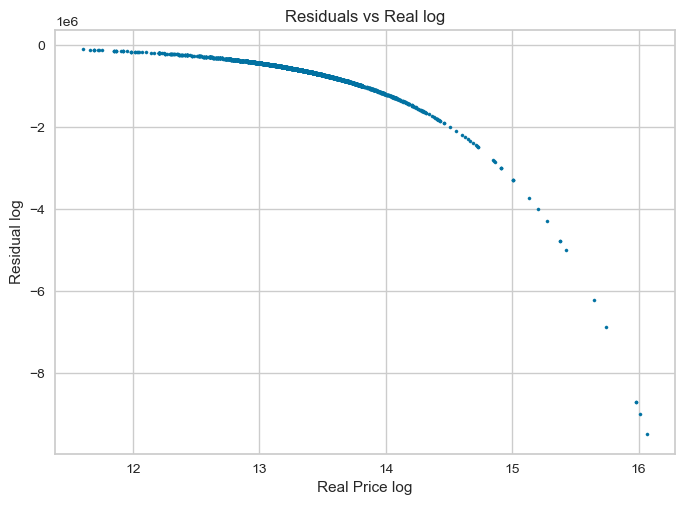

Ridge(alpha=20.0)
RMSE train: 0.3633803029587693
RMSE test : 0.37355801725885346


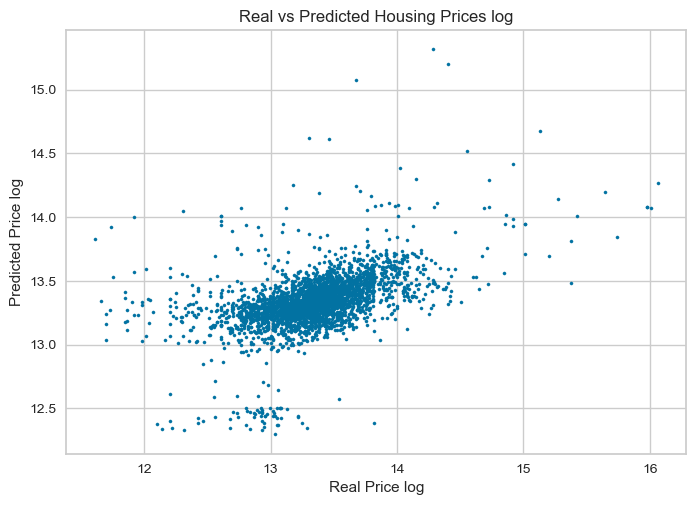

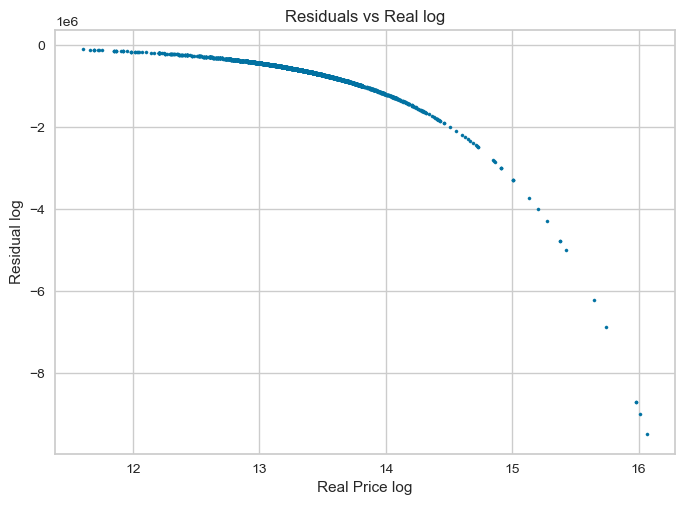

In [239]:
# a multiple linear regression model
model_base = linear_model.LinearRegression()

# With Ridge and Lasso
lambda_list_ridge = list(np.linspace(20, 25, 101))
model_ridge = Ridge(alpha=lambda_list_ridge[0])

lambda_list_lasso = list(np.linspace(0.0006, 0.0007, 11))
model_lasso = Lasso(alpha=lambda_list_lasso[0], max_iter=500000)

for model in [model_base, model_ridge]:
    train_test_log(model)

Results of enhanced model:

In [241]:
model_log = sm.OLS(y_train_log, sm.add_constant(X_train)).fit()
y_pred = model_log.predict(sm.add_constant(X_test))
print_model_log = model_log.summary()
print(print_model_log)
rmse(y_test_log, y_pred)

                            OLS Regression Results                            
Dep. Variable:         Sale_Price_Log   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     413.5
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:09   Log-Likelihood:                -5078.5
No. Observations:               12490   AIC:                         1.018e+04
Df Residuals:                   12477   BIC:                         1.028e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

0.37369782147250435

The "enhanced" model achieved a better result by about 2% with a result of 28.5% accuracy. This can be seen because the log conversion allowed for more linearity and a more normalized distribution. Doing this created a slighly more accurate regression model. Overall, both models performed very poorly which indicates that attribute selection or attribute manipulation was not satisfactory. Also, since sale price was filtered and only borough 5 was looked at, this could have been a factor to the poor accuracy of the models. 